<a href="https://colab.research.google.com/github/OweT1/personal/blob/main/Our_World_In_Data_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading of packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount("/content/drive")

!ls /content/drive/MyDrive/'Colab Datasets'/'Our World In Data - Energy'

Mounted at /content/drive
owid-energy.csv


# Reading in of data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/Our World In Data - Energy/owid-energy.csv")

df.head()
df.dtypes

country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object

# Exploring of dataset

In [4]:
df.isna().sum()

country                       0
year                          0
iso_code                   5470
population                 3861
gdp                       10777
                          ...  
wind_elec_per_capita      14101
wind_electricity          13214
wind_energy_per_capita    17111
wind_share_elec           15019
wind_share_energy         16445
Length: 129, dtype: int64

In [5]:
df = df.dropna(subset = ['iso_code'])

df.isna().sum()

country                       0
year                          0
iso_code                      0
population                  105
gdp                        5550
                          ...  
wind_elec_per_capita       9282
wind_electricity           9282
wind_energy_per_capita    12248
wind_share_elec           10697
wind_share_energy         12248
Length: 129, dtype: int64

# Visualisation 1
We will look at the trends in `population`, `gdp`, and `energy_consumption` (`fossil_fuel_consumption`, `renewables_consumption`, `nuclear_consumption`) over the years from 1965 to 2018.

In [7]:
df_1 = df.groupby("year").sum().reset_index()
df_1["total_consumption"] = df_1["fossil_fuel_consumption"] + df_1["renewables_consumption"] + df_1["nuclear_consumption"]
df_1 = df_1[(df_1["year"] >= 1965) & (df_1["year"] <= 2021) & (df_1["total_consumption"] > 0) & (df_1["population"] > 0) & (df_1["gdp"] > 0)].reset_index()
df_1 = df_1[["year", "population", "gdp", "total_consumption"]]
df_1["gdp"] = df_1["gdp"] / 10**4
df_1["total_consumption"] = df_1["total_consumption"] * 10**5
df_1 = df_1.rename(columns = {"population": "Population", "gdp": "GDP (in 0,000s)", "total_consumption": "Total Consumption (TWh in 00,000s)"})
df_1 = df_1.melt("year", var_name = "type", value_name = "value")
print(df_1)

     year                                type         value
0    1965                          Population  2.972496e+09
1    1966                          Population  3.035320e+09
2    1967                          Population  3.097829e+09
3    1968                          Population  3.162625e+09
4    1969                          Population  3.229886e+09
..    ...                                 ...           ...
157  2014  Total Consumption (TWh in 00,000s)  1.459983e+10
158  2015  Total Consumption (TWh in 00,000s)  1.470748e+10
159  2016  Total Consumption (TWh in 00,000s)  1.490766e+10
160  2017  Total Consumption (TWh in 00,000s)  1.518593e+10
161  2018  Total Consumption (TWh in 00,000s)  1.559771e+10

[162 rows x 3 columns]


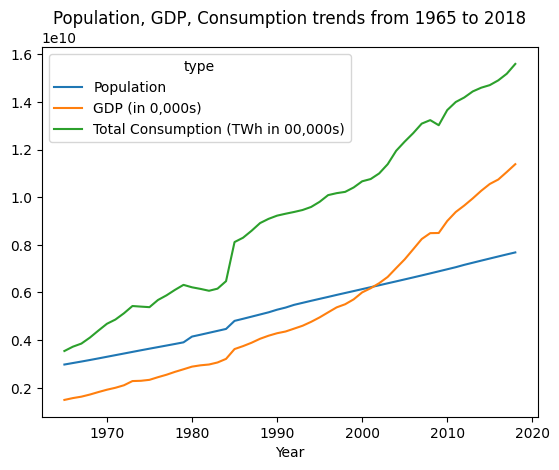

In [8]:
# f, axes = plt.subplots(3, 1)
# sns.lineplot(data = df_1, x = 'year', y = 'population', ax = axes[0], color = "red").set(xlabel = "Year", ylabel = "Population", title = "Trends from 1965 to 2018")
# sns.lineplot(data = df_1, x = 'year', y = 'gdp', ax = axes[1], color = "green").set(xlabel = "Year", ylabel = "GDP")
# sns.lineplot(data = df_1, x = 'year', y = 'total_consumption', ax = axes[2], color = "blue").set(xlabel = "Year", ylabel = "Total Energy Consumption")

plot_1 = sns.lineplot(data = df_1, x = 'year', y = 'value', hue = 'type')
plot_1.set(xlabel = "Year", ylabel = "", title = "Population, GDP, Consumption trends from 1965 to 2018")

plt.show()

# Visualisation 2
We will observe the energy consumption trends for 9 different energy sources (`biofuel_consumption`, `coal_consumption`, `gas_consumption`, `hydro_consumption`, `nuclear_consumption`, `oil_consumption`, `other_renewable_consumption`, `solar_consumption`, `wind_consumption`)

In [9]:
df_2 = df.groupby("year").sum().reset_index()
df_2 = df_2[(df_2["year"] >= 1965) & (df_2["year"] <= 2021)].reset_index()
df_2 = df_2[["year", "biofuel_consumption", "coal_consumption", "gas_consumption", "hydro_consumption", "nuclear_consumption", "oil_consumption", "other_renewable_consumption", "solar_consumption", "wind_consumption"]]
df_2 = df_2.melt("year", var_name = "type", value_name = "value")

print(df_2)

     year                 type     value
0    1965  biofuel_consumption     0.000
1    1966  biofuel_consumption     0.000
2    1967  biofuel_consumption     0.000
3    1968  biofuel_consumption     0.000
4    1969  biofuel_consumption     0.000
..    ...                  ...       ...
508  2017     wind_consumption  3006.435
509  2018     wind_consumption  3323.315
510  2019     wind_consumption  3699.320
511  2020     wind_consumption  4145.349
512  2021     wind_consumption  4821.798

[513 rows x 3 columns]


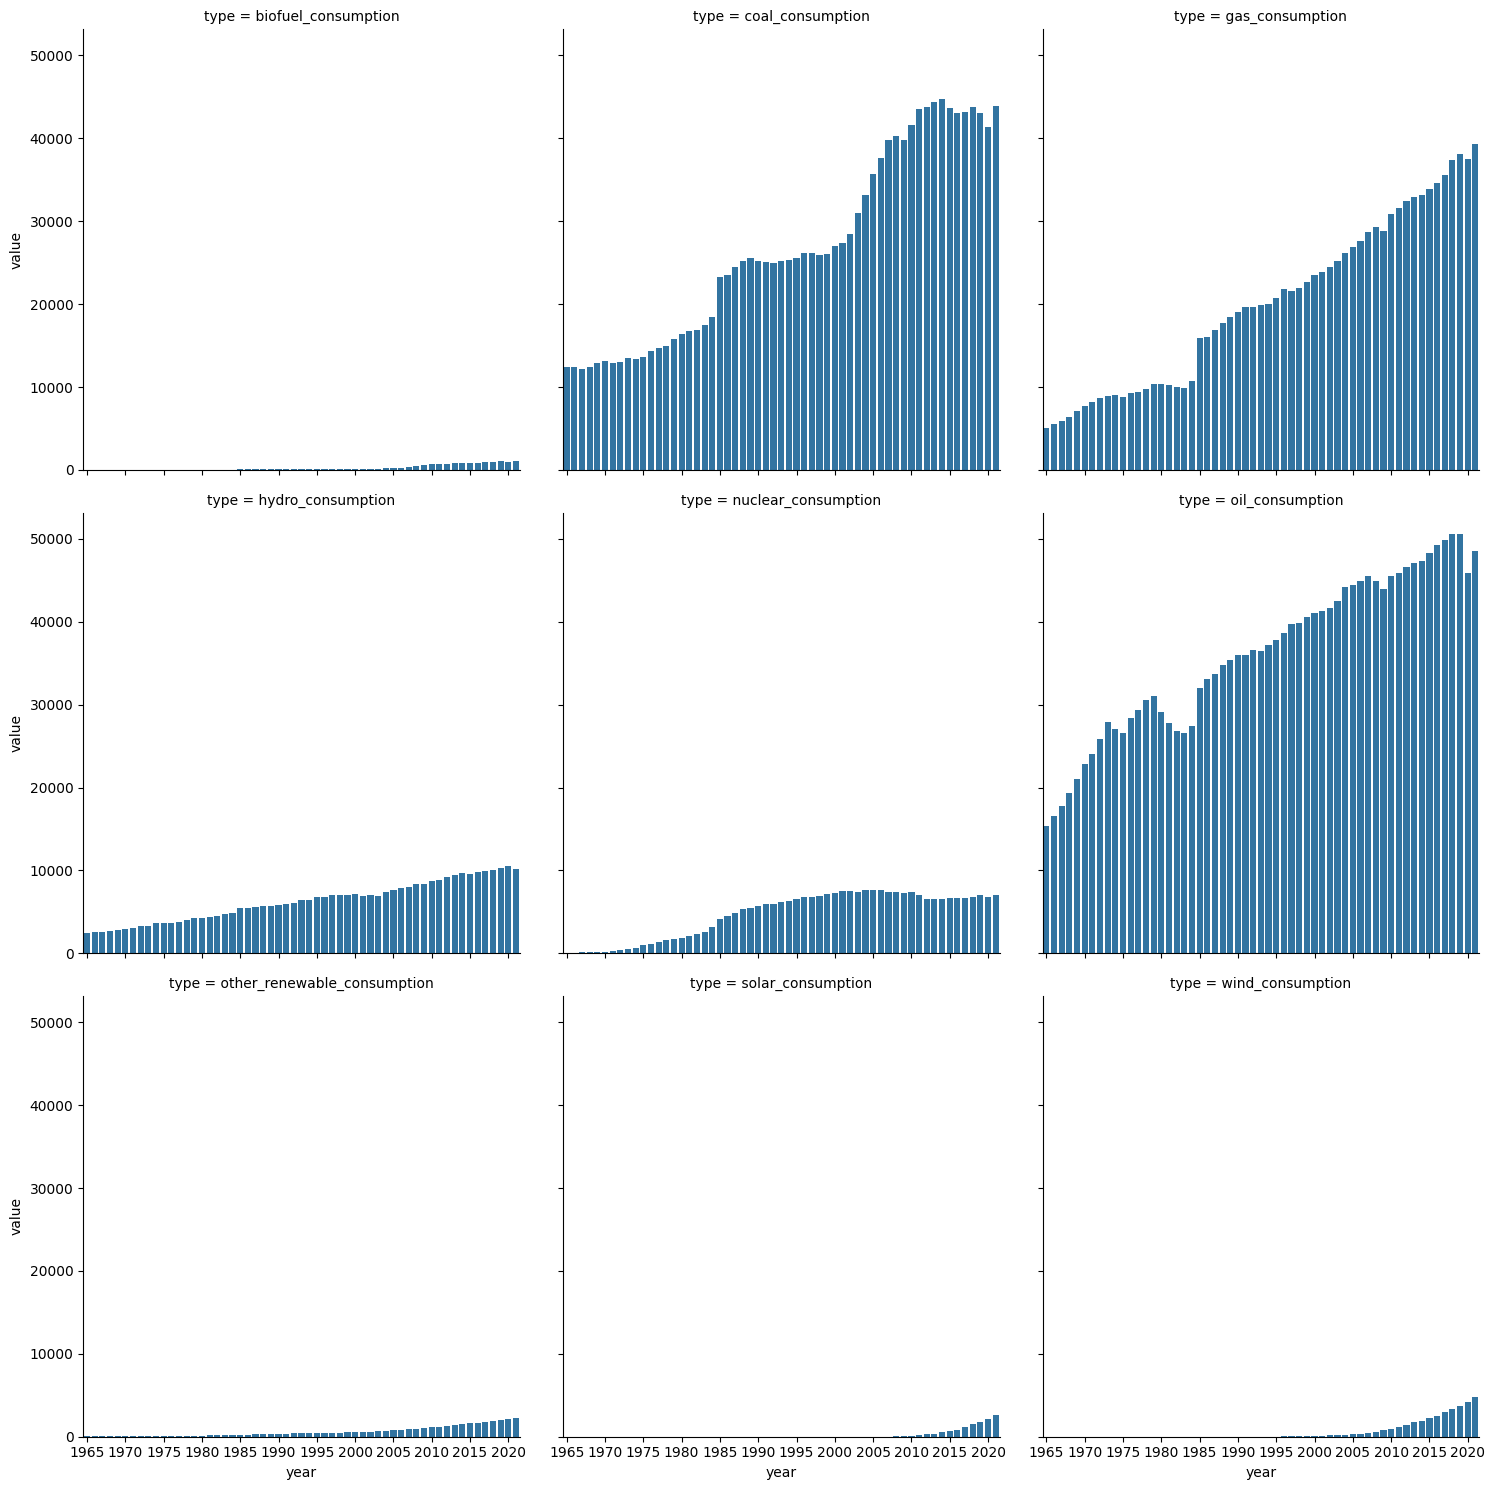

In [10]:
start_year = 1965
end_year = 2021

ticks = range(0, end_year-start_year, 5)
labels = range(start_year, end_year, 5)

sns.catplot(data = df_2, x = 'year', y = 'value', col = 'type', kind = 'bar', col_wrap = 3)
plt.xticks(ticks = ticks, labels = labels)
plt.show()

# f, axes = plt.subplots(3, 3)

# sns.barplot(data = df_2, x = 'year', y = 'biofuel_consumption', ax = axes[0][0]).set(xlabel = "", ylabel = "", title = "Biofuel")
# sns.lineplot(data = df_2, x = 'year', y = 'hydro_consumption', ax = axes[0][1]).set(xlabel = "", ylabel = "", title = "Hydro")
# sns.lineplot(data = df_2, x = 'year', y = 'other_renewable_consumption', ax = axes[0][2]).set(xlabel = "", ylabel = "", title = "Other Renewables")
# sns.lineplot(data = df_2, x = 'year', y = 'solar_consumption', ax = axes[1][0]).set(xlabel = "", ylabel = "", title = "Solar")
# sns.lineplot(data = df_2, x = 'year', y = 'wind_consumption', ax = axes[1][1]).set(xlabel = "", ylabel = "", title = "Wind")
# sns.lineplot(data = df_2, x = 'year', y = 'nuclear_consumption', ax = axes[1][2]).set(xlabel = "", ylabel = "", title = "Nuclear")
# sns.lineplot(data = df_2, x = 'year', y = 'coal_consumption', ax = axes[2][0]).set(xlabel = "", ylabel = "", title = "Coal")
# sns.lineplot(data = df_2, x = 'year', y = 'gas_consumption', ax = axes[2][1]).set(xlabel = "", ylabel = "", title = "Gas")
# sns.lineplot(data = df_2, x = 'year', y = 'oil_consumption', ax = axes[2][2]).set(xlabel = "", ylabel = "", title = "Oil")

# plt.xticks(visible = False)


# Visualisation 3
Lastly, we want to see the consumption of clean (`low_carbon_consumption`) and non-clean (`fossil_fuel_consumption`) energy sources over the years.

In [11]:
df_3 = df.groupby("year").sum().reset_index()
df_3 = df_3[(df_3["year"] >= 1965) & (df_3["year"] <= 2021)].reset_index()
df_3 = df_3[["year", "low_carbon_consumption", "fossil_fuel_consumption"]]
df_3[["low_carbon_consumption", "fossil_fuel_consumption"]] = df_3[["low_carbon_consumption", "fossil_fuel_consumption"]].divide(df_3[["low_carbon_consumption", "fossil_fuel_consumption"]].sum(axis = 1), axis = 0)

print(df_3.head())

   year  low_carbon_consumption  fossil_fuel_consumption
0  1965                0.070995                 0.929005
1  1966                0.072004                 0.927996
2  1967                0.071835                 0.928165
3  1968                0.070833                 0.929167
4  1969                0.069827                 0.930173


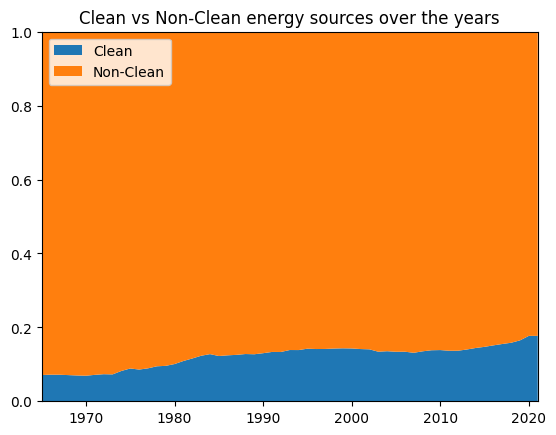

In [12]:
plt.stackplot(df_3["year"], df_3["low_carbon_consumption"], df_3["fossil_fuel_consumption"], labels = ["Clean", "Non-Clean"])
plt.legend(loc = "upper left")
plt.margins(0, 0)
plt.title("Clean vs Non-Clean energy sources over the years")
plt.show()